In [1]:
## IMPORTING TOOLS AND LIBRARY
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv("hypothyroid.csv")

In [5]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative


In [6]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [7]:
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,negative
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,negative
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,negative
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,negative
3771,64,F,f,f,f,f,f,f,f,f,...,t,99,t,1.07,t,92,f,?,other,negative


In [8]:
df['age'] = pd.to_numeric(df['age'].str.replace('?', ''), errors='coerce').fillna(0).astype(int)
df['TSH'] = pd.to_numeric(df['TSH'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['T3'] = pd.to_numeric(df['T3'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['TT4'] = pd.to_numeric(df['TT4'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['T4U'] = pd.to_numeric(df['T4U'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['FTI'] = pd.to_numeric(df['FTI'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)

In [9]:
df.drop('TBG_measured',axis=1,inplace=True)
df.drop('TBG',axis=1,inplace=True)

In [10]:
categorical_columns = df.columns[df.dtypes=="object"]
numerical_columns = df.columns[df.dtypes!="object"]

In [11]:
for col in categorical_columns:
    print(f"{col} has {df[col].unique()}  values. \n")

sex has ['F' 'M' '?']  values. 

on_thyroxine has ['f' 't']  values. 

query_on_thyroxine has ['f' 't']  values. 

on_antithyroid_medication has ['f' 't']  values. 

sick has ['f' 't']  values. 

pregnant has ['f' 't']  values. 

thyroid_surgery has ['f' 't']  values. 

I131_treatment has ['f' 't']  values. 

query_hypothyroid has ['f' 't']  values. 

query_hyperthyroid has ['f' 't']  values. 

lithium has ['f' 't']  values. 

goitre has ['f' 't']  values. 

tumor has ['f' 't']  values. 

hypopituitary has ['f' 't']  values. 

psych has ['f' 't']  values. 

TSH_measured has ['t' 'f']  values. 

T3_measured has ['t' 'f']  values. 

TT4_measured has ['t' 'f']  values. 

T4U_measured has ['t' 'f']  values. 

FTI_measured has ['t' 'f']  values. 

referral_source has ['SVHC' 'other' 'SVI' 'STMW' 'SVHD']  values. 

Class has ['negative' 'compensated_hypothyroid' 'primary_hypothyroid'
 'secondary_hypothyroid']  values. 



In [12]:
df.drop(df[df['sex'] == '?'].index, inplace=True)

In [13]:
#F =0
#M=1
#t=1
#f=0
#referral_source'SVHC' 'other' 'SVI' 'SVHD' 'STMW'

In [14]:
Class_map = {'negative':1,'compensated_hypothyroid':2 ,'primary_hypothyroid':3 ,'secondary_hypothyroid':4}

In [15]:
df["Class"]=df["Class"].map(Class_map)

In [16]:
referral_source_map = {'SVHC':1,'other':2 ,'SVI':3 ,'SVHD':4,"STMW":5}
df["referral_source"]=df["referral_source"].map(referral_source_map)

In [17]:
sex_map={"F":0,"M":1}
df["sex"]=df["sex"].map(sex_map)

In [18]:
on_thyroxine_map = {"f":0,"t":1}
df["on_thyroxine"]=df["on_thyroxine"].map(on_thyroxine_map)

In [19]:
query_on_thyroxine_map = {"f":0,"t":1}
df["query_on_thyroxine"]=df["query_on_thyroxine"].map(query_on_thyroxine_map)

In [20]:
on_antithyroid_medication_map = {"f":0,"t":1}
df["on_antithyroid_medication"]=df["on_antithyroid_medication"].map(on_antithyroid_medication_map)

In [21]:
sick_map = {"f":0,"t":1}
df["sick"]=df["sick"].map(sick_map)

In [22]:
pregnant_map = {"f":0,"t":1}
df["pregnant"]=df["pregnant"].map(pregnant_map)

In [23]:
thyroid_surgery_map = {"f":0,"t":1}
df["thyroid_surgery"]=df["thyroid_surgery"].map(thyroid_surgery_map)

In [24]:
I131_treatment_map = {"f":0,"t":1}
df["I131_treatment"]=df["I131_treatment"].map(I131_treatment_map)

In [25]:
query_hypothyroid_map = {"f":0,"t":1}
df["query_hypothyroid"]=df["query_hypothyroid"].map(query_hypothyroid_map)

In [26]:
lithium_map = {"f":0,"t":1}
df["lithium"]=df["lithium"].map(lithium_map)

In [27]:
tumor_map = {"f":0,"t":1}
df["tumor"]=df["tumor"].map(tumor_map)

In [28]:
goitre_map = {"f":0,"t":1}
df["goitre"]=df["goitre"].map(goitre_map)

In [29]:
hypopituitary_map = {"f":0,"t":1}
df["hypopituitary"]=df["hypopituitary"].map(hypopituitary_map)

In [30]:
psych_map = {"f":0,"t":1}
df["psych"]=df["psych"].map(psych_map)

In [31]:
TT4_measured_map = {"t":1,"f":0}
df["TT4_measured"]=df["TT4_measured"].map(TT4_measured_map)

In [32]:
TSH_measured_map = {"t":0,"f":1}
df["TSH_measured"]=df["TSH_measured"].map(TSH_measured_map)

In [33]:
T4U_measured_map = {"t":0,"f":1}
df["T4U_measured"]=df["T4U_measured"].map(T4U_measured_map)

In [34]:
FTI_measured_map = {"t":0,"f":1}
df["FTI_measured"]=df["FTI_measured"].map(FTI_measured_map)

In [35]:
query_hyperthyroid_map = {"f":0,"t":1}
df["query_hyperthyroid"]=df["query_hyperthyroid"].map(query_hyperthyroid_map)

In [36]:
T3_measured_map = {"t":0,"f":1}
df["T3_measured"]=df["T3_measured"].map(T3_measured_map)

In [37]:
for col in categorical_columns:
    print(f"{col} has {df[col].unique()}  values. \n")

sex has [0 1]  values. 

on_thyroxine has [0 1]  values. 

query_on_thyroxine has [0 1]  values. 

on_antithyroid_medication has [0 1]  values. 

sick has [0 1]  values. 

pregnant has [0 1]  values. 

thyroid_surgery has [0 1]  values. 

I131_treatment has [0 1]  values. 

query_hypothyroid has [0 1]  values. 

query_hyperthyroid has [0 1]  values. 

lithium has [0 1]  values. 

goitre has [0 1]  values. 

tumor has [0 1]  values. 

hypopituitary has [0 1]  values. 

psych has [0 1]  values. 

TSH_measured has [0 1]  values. 

T3_measured has [0 1]  values. 

TT4_measured has [1 0]  values. 

T4U_measured has [0 1]  values. 

FTI_measured has [0 1]  values. 

referral_source has [1 2 3 4 5]  values. 

Class has [1 2 3 4]  values. 



In [38]:
df.dtypes

age                            int32
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
referral_source                int64
C

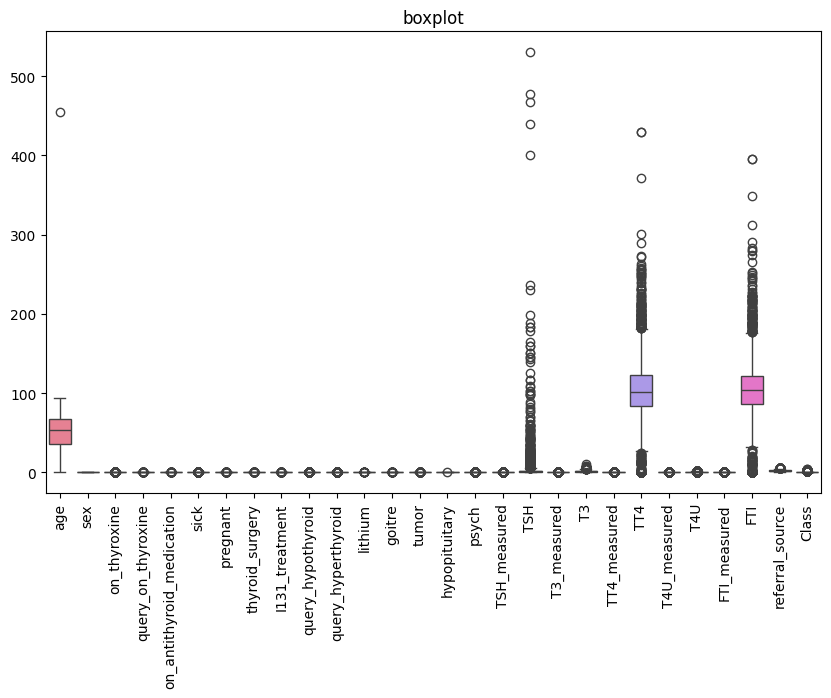

In [39]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,2)
sns.boxplot(data = df)
plt.title("boxplot")

plt.xticks(rotation=90)

plt.show()

In [40]:
numerical_columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [41]:
np.quantile(df["TT4"],[0,.25,.50,.75,1])

array([  0.,  84., 102., 123., 430.])

In [42]:
q1 = df["TT4"].quantile(0.25)
q3 = df["TT4"].quantile(0.75)

In [43]:
IQR= q3-q1

In [44]:
l_fence = q1-1.5*IQR
u_fence = q3+1.5*IQR

In [45]:
df["TT4"]=np.where((df.TT4>=u_fence) | (df.TT4<=l_fence),df["TT4"].mean(),df["TT4"])

In [46]:
np.quantile(df["TSH"],[0,.25,.50,.75,1])
q1 = df["TSH"].quantile(0.25)
q3 = df["TSH"].quantile(0.75)
IQR= q3-q1
l_fence = q1-1.5*IQR
u_fence = q3+1.5*IQR
df["TSH"]=np.where((df.TSH>=u_fence) | (df.TSH<=l_fence),df["TSH"].mean(),df["TSH"])

In [47]:
lower_cap = df["FTI"].quantile(0.05)
upper_cap = df["FTI"].quantile(0.95)
df['FTI'] = np.where(df['FTI'] < lower_cap, lower_cap,
                              np.where(df['FTI'] > upper_cap, upper_cap, df['FTI']))

In [48]:
lower_cap = df["TT4"].quantile(0.05)
upper_cap = df["TT4"].quantile(0.95)
df['TT4'] = np.where(df["TT4"] < lower_cap, lower_cap,
                              np.where(df['TT4'] > upper_cap, upper_cap, df['TT4']))

In [49]:
lower_cap = df["T3"].quantile(0.05)
upper_cap = df["T3"].quantile(0.95)
df['T3'] = np.where(df["T3"] < lower_cap, lower_cap,
                              np.where(df['T3'] > upper_cap, upper_cap, df['T3']))

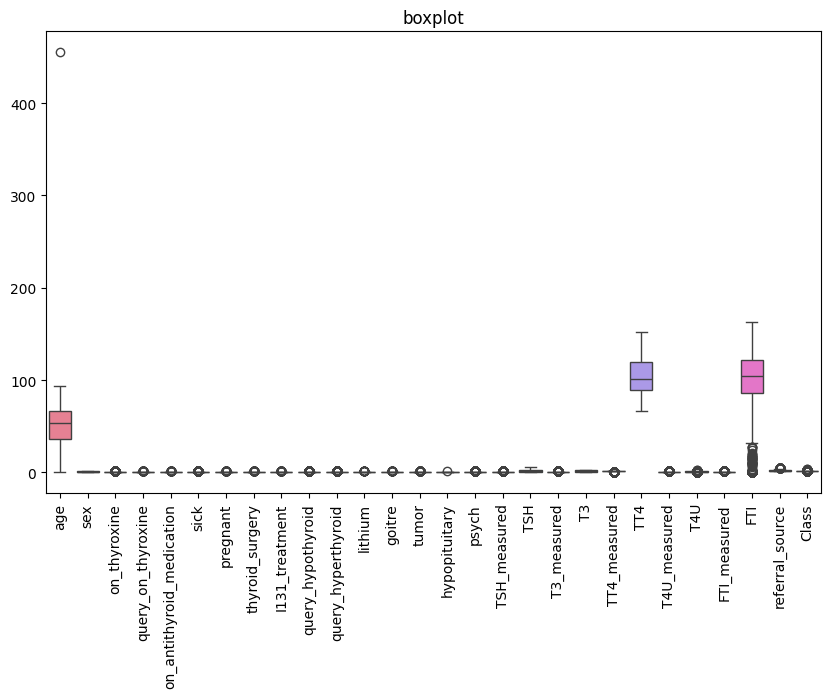

In [50]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,2)
sns.boxplot(data = df)
plt.title("boxplot")

plt.xticks(rotation=90)

plt.show()

In [51]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [52]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source
0,41,0,0,0,0,0,0,0,0,0,...,1.30,0,2.5,1,125.000000,0,1.14,0,109.0,1
1,23,0,0,0,0,0,0,0,0,0,...,4.10,0,2.0,1,102.000000,1,0.00,1,0.0,2
2,46,1,0,0,0,0,0,0,0,0,...,0.98,1,0.0,1,109.000000,0,0.91,0,120.0,2
3,70,0,1,0,0,0,0,0,0,0,...,0.16,0,1.9,1,152.000000,1,0.00,1,0.0,2
4,70,0,0,0,0,0,0,0,0,0,...,0.72,0,1.2,1,66.000000,0,0.87,0,70.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,...,0.00,1,0.0,0,101.721645,1,0.00,1,0.0,2
3768,68,0,0,0,0,0,0,0,0,0,...,1.00,0,2.1,1,124.000000,0,1.08,0,114.0,3
3769,74,0,0,0,0,0,0,0,0,0,...,5.10,0,1.8,1,112.000000,0,1.07,0,105.0,2
3770,72,1,0,0,0,0,0,0,0,0,...,0.70,0,2.0,1,82.000000,0,0.94,0,87.0,3


In [53]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: Class, Length: 3622, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.3,random_state=1)

In [55]:
X_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source
2481,64,0,0,0,0,0,0,0,0,1,...,0.680,0,1.4,1,92.000000,0,0.81,0,114.00,3
299,39,1,0,1,0,0,0,0,0,0,...,0.000,1,0.0,1,66.000000,0,0.87,0,72.00,2
2093,30,0,0,0,0,0,0,0,0,0,...,4.300,0,2.0,1,82.000000,1,0.00,1,0.00,2
2980,23,1,0,0,0,0,0,0,0,0,...,0.780,0,2.0,1,102.000000,0,0.97,0,106.00,1
100,28,0,0,0,0,0,0,0,0,0,...,1.300,0,1.4,1,120.000000,0,0.82,0,146.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,62,0,1,1,0,0,0,0,0,0,...,0.025,0,2.2,1,101.721645,0,1.03,0,162.95,2
941,59,0,0,0,0,0,0,0,0,1,...,2.800,1,0.0,1,134.000000,0,1.05,0,128.00,2
1141,71,0,0,0,0,0,0,0,0,0,...,1.300,0,0.9,1,126.000000,0,0.85,0,148.00,3
248,24,0,0,0,0,0,0,0,0,0,...,0.400,1,0.0,1,142.000000,0,1.20,0,118.00,2


In [56]:
X_test

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source
3767,30,0,0,0,0,0,0,0,0,0,...,0.0000,1,0.0,0,101.721645,1,0.00,1,0.00,2
3464,48,0,0,0,0,0,0,0,0,0,...,0.3000,0,2.4,1,117.000000,0,1.02,0,115.00,2
1077,55,0,1,0,0,0,0,0,0,0,...,0.0000,1,0.0,0,101.721645,1,0.00,1,0.00,2
1151,76,1,0,0,0,0,0,0,0,0,...,4.5184,0,2.1,1,89.000000,0,1.14,0,78.00,3
3518,37,1,0,0,0,0,0,0,0,0,...,0.0000,1,0.0,0,101.721645,1,0.00,1,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812,72,0,0,0,0,0,0,0,0,1,...,1.1000,1,0.0,1,131.000000,0,0.50,0,162.95,2
1181,79,0,0,0,0,0,0,0,0,0,...,4.5184,1,0.0,1,144.000000,0,1.29,0,111.00,2
3324,65,0,0,0,0,0,0,0,0,0,...,1.6000,0,1.9,1,99.000000,0,1.03,0,97.00,3
577,45,0,0,0,0,0,0,0,0,0,...,0.9700,0,1.1,1,77.000000,0,0.86,0,89.00,3


In [57]:
y_train

2481    1
299     1
2093    1
2980    1
100     1
       ..
2874    1
941     1
1141    1
248     1
1106    1
Name: Class, Length: 2535, dtype: int64

In [58]:
y_test

3767    1
3464    1
1077    1
1151    2
3518    1
       ..
2812    1
1181    2
3324    1
577     1
1998    1
Name: Class, Length: 1087, dtype: int64

In [59]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
from sklearn.tree import DecisionTreeClassifier


In [62]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':[1, 2, 3, 4, 6, 8],
    'splitter':['best', 'random'],
    'max_features': ['sqrt', 'log2']
}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [65]:
model = GridSearchCV(clf, param_grid=parameter, cv = 5, scoring = "accuracy")
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [66]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'best'}

In [68]:
model.best_score_

0.9656804733727811

In [69]:
model_pred = model.predict(X_test)

In [70]:
df.shape

(3622, 28)

In [71]:
import pickle
pickle.dump(scaler,open("scaling.pkl","wb"))

In [72]:
import pickle

In [73]:
pickle.dump(model,open("model.pkl","wb"))

In [74]:
pickled_model = pickle.load(open("model.pkl","rb"))

In [75]:
pickled_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)